In [162]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [205]:
df = pd.read_csv("data\Scrapping_03-12-23_12-10-44.csv", na_values="--", date_parser= "data")
df["opoznienie"].fillna(0);
df.tail(20)

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
92528,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Sopot,24.12,09:50,09:59,9.0
92529,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Gdańsk Oliwa,24.12,09:55,10:05,10.0
92530,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Gdańsk Wrzeszcz,24.12,10:00,10:10,10.0
92531,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Gdańsk Główny,24.12,10:07,10:17,10.0
92532,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Tczew,24.12,10:27,10:40,13.0
92533,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Malbork,24.12,10:40,10:54,14.0
92534,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Prabuty,24.12,11:03,11:20,17.0
92535,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Iława Główna,24.12,11:23,11:41,18.0
92536,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Działdowo,24.12,11:57,12:15,18.0
92537,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Mława,24.12,12:08,12:28,20.0


In [206]:
train_types = list(map(lambda x: x.split()[0], df["nazwa_pociagu"]))
train_types_dict = {x: train_types.count(x) for x in set(train_types)}
train_types_dict

{'MHE': 6052,
 'EIE': 10404,
 'MPE': 38700,
 'ENE': 672,
 'EIJ': 22464,
 'MPS': 2856,
 'MPJ': 2568,
 'MPM': 1932,
 'MME': 2760,
 'ECE': 4140}

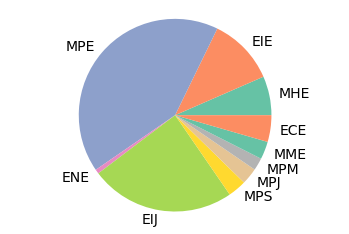

In [225]:
labels = []
sizes = []

for x, y in train_types_dict.items():
    labels.append(x)
    sizes.append(y)
    
plt.pie(sizes, labels = labels, textprops = {'fontsize':14}, colors = sns.color_palette('Set2'))

plt.axis('equal')
#plt.savefig("piechart.png")

In [208]:
mean_delay = {x: np.mean(df[df["stacja_pomiaru"] == x]["opoznienie"]) for x in set(df["stacja_pomiaru"])}

In [209]:
df["data"] = df["data"].apply(lambda x: datetime.strptime(x[:5] + ".2023" if int(x.split(".")[1]) < 10 else x[:5] + ".2022", "%d.%m.%Y").date())

In [210]:
df["dzien_tygodnia"] = df["data"].apply(lambda x: x.weekday()) # 0 - pon, 6 - nd

In [211]:
df

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie,dzien_tygodnia
0,EIJ 3104/5,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-10,18:04,18:04,0.0,4
1,EIJ 3104/5,Kraków Główny,Warszawa Gdańska,Warszawa Gdańska,2023-03-10,20:31,20:27,-4.0,4
2,EIJ 3104/5,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-09,18:04,18:04,0.0,3
3,EIJ 3104/5,Kraków Główny,Warszawa Gdańska,Warszawa Gdańska,2023-03-09,20:31,20:28,-3.0,3
4,EIJ 3104/5,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-08,18:04,18:04,0.0,2
...,...,...,...,...,...,...,...,...,...
92543,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Warszawa Zachodnia,2022-12-24,14:00,14:26,26.0,5
92544,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Opoczno Południe,2022-12-24,15:08,15:49,41.0,5
92545,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Włoszczowa Północ,2022-12-24,15:41,16:28,47.0,5
92546,MPE 83152/3 LUBOMIRSKI,Kołobrzeg,Kraków Główny,Miechów,2022-12-24,16:18,16:58,40.0,5


In [218]:
mean_delay_weekday = {x: np.mean(df[df["dzien_tygodnia"] == x]["opoznienie"]) for x in set(df["dzien_tygodnia"])}
mean_delay_weekday

{0: 4.126170527353376,
 1: 3.671549131826559,
 2: 7.034062711482067,
 3: 5.045924225028703,
 4: 9.076768623251455,
 5: 4.921200510855683,
 6: 3.4956515489110904}

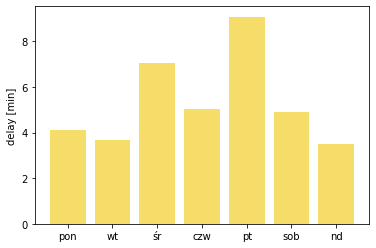

In [226]:
plt.bar(["pon", "wt", "śr", "czw", "pt", "sob", "nd"], mean_delay_weekday.values(), color = "#f6dc68")
plt.ylabel("delay [min]")
#plt.savefig("weekday.png")